In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

2024-03-13 15:12:38.547053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 15:12:38.807572: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 15:12:40.142366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-13 15:12:40.142546: W tensorflow/strea

In [2]:
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
dataset_info

test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']

2024-03-13 15:13:37.642308: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-13 15:13:37.642368: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-13 15:13:37.642415: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (2abfc3aae244): /proc/driver/nvidia/version does not exist
2024-03-13 15:13:37.642774: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in 

In [3]:
import json

In [4]:
class_labels = dataset_info.features['label'].names

print("Class Labels:", class_labels)

Class Labels: ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow

In [5]:

label_to_number = {label: i for i, label in enumerate(class_labels)}

json_object = json.dumps(label_to_number, indent=2)

print(json_object)

{
  "pink primrose": 0,
  "hard-leaved pocket orchid": 1,
  "canterbury bells": 2,
  "sweet pea": 3,
  "english marigold": 4,
  "tiger lily": 5,
  "moon orchid": 6,
  "bird of paradise": 7,
  "monkshood": 8,
  "globe thistle": 9,
  "snapdragon": 10,
  "colt's foot": 11,
  "king protea": 12,
  "spear thistle": 13,
  "yellow iris": 14,
  "globe-flower": 15,
  "purple coneflower": 16,
  "peruvian lily": 17,
  "balloon flower": 18,
  "giant white arum lily": 19,
  "fire lily": 20,
  "pincushion flower": 21,
  "fritillary": 22,
  "red ginger": 23,
  "grape hyacinth": 24,
  "corn poppy": 25,
  "prince of wales feathers": 26,
  "stemless gentian": 27,
  "artichoke": 28,
  "sweet william": 29,
  "carnation": 30,
  "garden phlox": 31,
  "love in the mist": 32,
  "mexican aster": 33,
  "alpine sea holly": 34,
  "ruby-lipped cattleya": 35,
  "cape flower": 36,
  "great masterwort": 37,
  "siam tulip": 38,
  "lenten rose": 39,
  "barbeton daisy": 40,
  "daffodil": 41,
  "sword lily": 42,
  "poinse

In [6]:
num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0

for example in training_set:
  num_training_examples += 1

for example in validation_set:
  num_validation_examples += 1

for example in test_set:
  num_test_examples += 1

print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))

num_classes = dataset_info.features['label'].num_classes
print('Total Number of Classes: {}'.format(num_classes))

Total Number of Training Images: 1020
Total Number of Validation Images: 1020
Total Number of Test Images: 6149 

Total Number of Classes: 102


In [144]:
import numpy

IMAGE_RES = 224

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = training_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = validation_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

test_batches = test_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

In [134]:
for images, labels in train_batches.take(1):
    sample_image = images[0]
    print("Image size:", sample_image.shape)

Image size: (224, 3)


2024-03-13 17:15:07.348399: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [145]:
input_shape = (224, 224, 3)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

In [159]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, Reshape
from tensorflow.keras import layers, Sequential

def tensorflow_based_model():
    model = Sequential()  
    
    model.add(data_augmentation) 
    
    model.add(Conv2D(filters=16, kernel_size=2, input_shape=(224,224,3), padding='same')) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=2)) 

    model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))  
    model.add(MaxPooling2D(pool_size=2)) 

    model.add(Dropout(0.3))  
    model.add(Flatten())  
    model.add(Dense(150)) 
    model.add(Activation('relu'))  
    model.add(Dropout(0.4))  
    model.add(Dense(102, activation='softmax'))  

    return model

In [160]:
model = tensorflow_based_model() 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) 

In [161]:
from tensorflow.keras.utils import to_categorical

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_batches,
        batch_size = 32,
        epochs=30,
        validation_data=validation_batches, 
        callbacks=[early_stopping])

Epoch 1/30


32/32 [==============================] - 33s 947ms/step - loss: 4.9605 - accuracy: 0.0039 - val_loss: 4.6247 - val_accuracy: 0.0098
Epoch 2/30
32/32 [==============================] - 29s 901ms/step - loss: 4.6267 - accuracy: 0.0069 - val_loss: 4.6218 - val_accuracy: 0.0186
Epoch 3/30
32/32 [==============================] - 30s 947ms/step - loss: 4.6245 - accuracy: 0.0059 - val_loss: 4.6196 - val_accuracy: 0.0147
Epoch 4/30
32/32 [==============================] - 29s 898ms/step - loss: 4.6177 - accuracy: 0.0176 - val_loss: 4.6120 - val_accuracy: 0.0176
Epoch 5/30
32/32 [==============================] - 30s 958ms/step - loss: 4.6089 - accuracy: 0.0186 - val_loss: 4.5935 - val_accuracy: 0.0167
Epoch 6/30
32/32 [==============================] - 29s 898ms/step - loss: 4.5929 - accuracy: 0.0176 - val_loss: 4.5647 - val_accuracy: 0.0196
Epoch 7/30
32/32 [==============================] - 30s 937ms/step - loss: 4.5621 - accuracy: 0.0167 - val_loss: 4.5366 - val_accuracy: 0.0186
Epoch 8/30

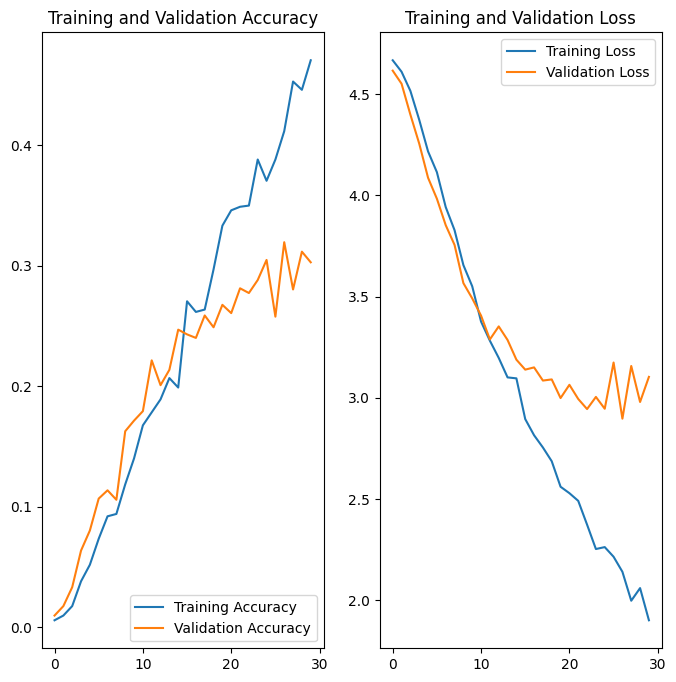

In [150]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [151]:
model.save('model_oxford/model_trained_valid5')

INFO:tensorflow:Assets written to: model_oxford/model_trained_valid5/assets


INFO:tensorflow:Assets written to: model_oxford/model_trained_valid5/assets


In [152]:
import pandas as pd
pd.DataFrame.from_dict(history.history).to_csv('model_oxford/history5.csv',index=False)